In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
from ase.build import bulk

# Build a bulk structure of MgO with rocksalt crystal structure
# Then, replace some of the Mg atoms with Fe atoms at a specified ratio.
Mg_conv_cell = bulk("MgO", crystalstructure="rocksalt", a=4.2, cubic=True)
rng = np.random.default_rng(123)
replace_element = "Mg"
new_elements=("Mg", "Fe")
T_low = 100
T_high = 1000
ratio = 0.5

In [2]:
from monty.serialization import loadfn
import tc.dataset
import tc.testing
from mace.calculators import mace_mp

# Only create the ensembles if they do not already exist
try:
    ensemble = loadfn(f"{''.join(new_elements)}O_ensemble4.json.gz")
    print("Ensemble already exist, skipping creation.")
except FileNotFoundError:
    print("Creating new ensembles...")
    calc = mace_mp(model="large", device="cuda", default_dtype="float32")
    ensembles = tc.dataset.make_ce_ensembles_from_mace(conv_cell=Mg_conv_cell, rng=rng, calc=calc, supercell_size=6,
                                                       replace_element=replace_element, new_elements=new_elements, bin_counts=50, bins=20)
    # This is likely to run out of VRAM, which is why we save the ensembles when we create them.
    for ens in ensembles[:1]:
        stats = tc.testing.evaluate_ensemble_vs_mace(ensemble=ens, calc=calc, conv_cell=Mg_conv_cell, rng=rng, 
                                                     replace_element=replace_element, new_elements=new_elements)

    ensemble_4, ensemble_6 = ensembles
    ensemble = ensemble_4



/home/colin/miniforge/envs/tc312/lib/python3.12/site-packages/e3nn/o3/_wigner.py:10: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  _Jd, _W3j_flat, _W3j_indices = torch.load(os.path.join(os.path.dirname(__file__), 'constants.pt'))


Creating new ensembles...
Using Materials Project MACE for MACECalculator with /home/colin/.cache/mace/MACE_MPtrj_20229model
Using float32 for MACECalculator, which is faster but less accurate. Recommended for MD. Use float64 for geometry optimization.


/home/colin/miniforge/envs/tc312/lib/python3.12/site-packages/mace/calculators/mace.py:143: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  torch.load(f=model_path, map_location=device)


Using head Default out of ['Default']
Default dtype float32 does not match model dtype float64, converting models to float32.
Total snapshots: 1002 for 864 cations


MACE energies:   0%|          | 0/1002 [00:00<?, ?it/s]

Primitive cell: MgFeO2 with 4 cations
Number of orbits: 92


Adding:   0%|          | 0/1002 [00:00<?, ?it/s]

Matched structures: 1002/1002
rank = 92 of 92 columns
RMSE     0.31 meV   MAX     3.31 meV
5-fold CV RMSE: 0.3343999420577831 meV


CE vs MACE:   0%|          | 0/30 [00:00<?, ?it/s]

 x_Li = 0.50 → CE = -8994.70 meV   MACE = -8834.96 meV
 x_Li = 0.20 → CE = -6605.59 meV   MACE = -6482.56 meV
 x_Li = 1.00 → CE =  -868.03 meV   MACE =     4.15 meV
 x_Li = 0.20 → CE = -7192.52 meV   MACE = -7090.71 meV
 x_Li = 0.80 → CE =   202.69 meV   MACE =   291.88 meV
 x_Li = 0.20 → CE = -7042.38 meV   MACE = -6976.94 meV
 x_Li = 1.00 → CE =  -868.03 meV   MACE =     4.15 meV
 x_Li = 0.80 → CE =   686.08 meV   MACE =   757.46 meV
 x_Li = 0.00 → CE =  -360.35 meV   MACE =     0.73 meV
 x_Li = 0.20 → CE = -6343.32 meV   MACE = -6339.25 meV
 x_Li = 0.20 → CE = -5894.45 meV   MACE = -5853.16 meV
 x_Li = 0.80 → CE =   747.58 meV   MACE =   789.93 meV
 x_Li = 1.00 → CE =  -868.03 meV   MACE =     4.15 meV
 x_Li = 0.20 → CE = -6991.10 meV   MACE = -6964.74 meV
 x_Li = 0.50 → CE = -9412.57 meV   MACE = -9474.12 meV
 x_Li = 0.20 → CE = -6691.34 meV   MACE = -6709.61 meV
 x_Li = 0.50 → CE = -9913.68 meV   MACE = -9920.17 meV
 x_Li = 0.80 → CE =  -390.40 meV   MACE =  -317.00 meV
 x_Li = 0.

In [3]:
calc = mace_mp(model="large", device="cuda", default_dtype="float64")
stats = tc.testing.evaluate_ensemble_vs_mace(ensemble=ensemble, calc=calc, conv_cell=Mg_conv_cell, rng=rng, 
                                                     replace_element=replace_element, new_elements=new_elements, comps=(0.1, 0.2, 0.5, 0.8, 0.9))

Using Materials Project MACE for MACECalculator with /home/colin/.cache/mace/MACE_MPtrj_20229model
Using float64 for MACECalculator, which is slower but more accurate. Recommended for geometry optimization.


/home/colin/miniforge/envs/tc312/lib/python3.12/site-packages/mace/calculators/mace.py:143: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  torch.load(f=model_path, map_location=device)


Using head Default out of ['Default']


CE vs MACE:   0%|          | 0/30 [00:00<?, ?it/s]

 x_Li = 0.10 → CE = -3244.32 meV   MACE = -3313.55 meV
 x_Li = 0.10 → CE = -3234.65 meV   MACE = -3303.43 meV
 x_Li = 0.90 → CE =  1408.94 meV   MACE =  1339.46 meV
 x_Li = 0.50 → CE = -9539.97 meV   MACE = -9707.89 meV
 x_Li = 0.90 → CE =  2215.17 meV   MACE =  2029.25 meV
 x_Li = 0.90 → CE =  1777.72 meV   MACE =  1706.16 meV
 x_Li = 0.90 → CE =  1745.89 meV   MACE =  1725.55 meV
 x_Li = 0.90 → CE =  2291.27 meV   MACE =  2206.30 meV
 x_Li = 0.10 → CE = -3263.07 meV   MACE = -3303.23 meV
 x_Li = 0.90 → CE =  2934.85 meV   MACE =  2685.19 meV
 x_Li = 0.80 → CE =   240.19 meV   MACE =   149.84 meV
 x_Li = 0.20 → CE = -6549.05 meV   MACE = -6514.38 meV
 x_Li = 0.90 → CE =  2173.96 meV   MACE =  2113.23 meV
 x_Li = 0.90 → CE =  2038.98 meV   MACE =  1934.98 meV
 x_Li = 0.20 → CE = -6016.81 meV   MACE = -6008.78 meV
 x_Li = 0.20 → CE = -6334.69 meV   MACE = -6294.28 meV
 x_Li = 0.10 → CE = -3376.19 meV   MACE = -3367.05 meV
 x_Li = 0.80 → CE =  -310.26 meV   MACE =  -110.46 meV
 x_Li = 0.

In [ ]:
"""
Single threaded Wang-Landau sampling
"""

import tc.wang_landau
import tc.testing

samples = tc.testing.sample_configs_fast(ensemble, rng, n_samples=10_000, ratio=ratio)
sampler, mu, min_E, max_E, bin_size = tc.wang_landau.run_wang_landau(ensemble=ensemble, samples=samples, rng=rng, 
                                                                     ratio=ratio, n_samples_per_site=200_000, num_bins=200,
                                                                     window_width_factor=(40,40), progress=True)
temperatures_K = np.linspace(T_low, T_high, 10_000)
Cv = tc.wang_landau.compute_thermodynamics(sampler, temperatures_K)
tc.wang_landau.generate_wl_plots( mu, min_E, max_E, bin_size, sampler, temperatures_K, Cv)

  0%|          | 0/10000 [00:00<?, ?it/s]

ratio: 0.5 CE energies: mean = -9699.64 meV, std =   462.63 meV, min = -11602.78 meV, max = -7316.46 meV
Energy window : [-28.205, 8.805] eV (200 bins, 0.1851 eV each)


Sampling 1 chain(s) from a cell with 512 sites:   2%|▏         | 1958901/102400000 [02:51<2:14:51, 12412.74it/s]

Metropolis:   0%|          | 0/200 [00:00<?, ?T/s]

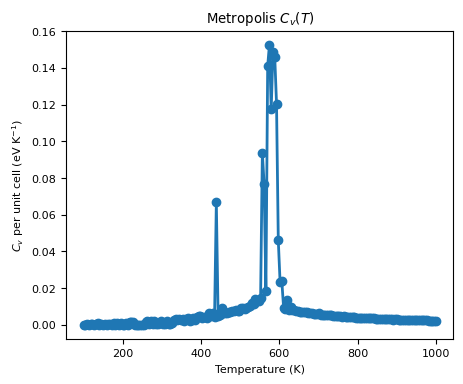

In [ ]:
"""
Parallel Metropolis heat-capacity sweep
"""

import os, numpy as np
from concurrent.futures import ProcessPoolExecutor
from tqdm.auto import tqdm
import tc.metropolis

# Temperatures to sample and an independent RNG seed for every worker (avoids accidental correlations).
Ts = np.linspace(T_low, T_high, 200)
seed_root = np.random.SeedSequence(42) # master seed
child_seeds = seed_root.spawn(len(Ts))

def _single_Cv(T, seed):
    rng = np.random.default_rng(seed)
    return tc.metropolis.run_metropolis_heat_capacity(
        ensemble, # cheap shallow copy is enough (I hope)
        T,
        rng,
        replace_element=replace_element,
        new_elements=new_elements,
        ratio=ratio,
        n_steps_per_site=10_000,
        thin_target=40_000,
    )

# Fan the temperature points out to all available cores.
n_workers = os.cpu_count() // 2 # type: ignore # leave some cores free for the GUI and other tasks for my laptop
print(f"Using {n_workers} workers for parallel sampling.")
with ProcessPoolExecutor(max_workers=n_workers) as pool:
    Cv = list(tqdm(pool.map(_single_Cv, Ts, child_seeds), total=len(Ts), desc="Metropolis", unit="T"))

tc.metropolis.plot_cv_curve(Ts, np.array(Cv))


In [ ]:
"""
Parallel Wang–Landau over composition grid
------------------------------------------
* Computes Cv(T) for each `ratio` in `ratios`
* Uses all available CPU cores via ProcessPoolExecutor
* Stores results in Cv_mat  (shape: len(ratios) × len(T))
"""

import os, numpy as np
from concurrent.futures import ProcessPoolExecutor, as_completed
from tqdm.auto import tqdm

import tc.wang_landau as wl
import tc.testing as tct

# ── input parameters ────────────────────────────────────────────────
ratios       = np.linspace(0.05, 0.95, 39)        # Mg fraction grid
temperatures = np.linspace(100, 1500, 500)        # K
num_bins     = 200
window_width = (40, 40)
n_steps_per  = 200_000

# ── helper to run one composition slice ─────────────────────────────
def _cv_for_ratio(r):
    rng_local = np.random.default_rng(int(r * 1e6) ^ 12345)
    samples = tct.sample_configs_fast(ensemble, rng_local,
                                      n_samples=10_000, ratio=r)
    sampler, *_ = wl.run_wang_landau(
        ensemble=ensemble,
        samples=samples,
        rng=rng_local,
        ratio=r,
        n_samples_per_site=n_steps_per,
        num_bins=num_bins,
        window_width_factor=window_width,
        progress=False,  # disable progress bar in workers
    )
    Cv = wl.compute_thermodynamics(sampler, temperatures)
    return r, Cv

# ── launch workers ─────────────────────────────────────────────────
n_workers = os.cpu_count()
Cv_mat = np.empty((len(ratios), len(temperatures)))

with ProcessPoolExecutor(max_workers=n_workers) as pool:
    futures = {pool.submit(_cv_for_ratio, r): idx
               for idx, r in enumerate(ratios)}
    with tqdm(total=len(futures), desc="WL slices") as pbar:
        for fut in as_completed(futures):
            idx = futures[fut]
            ratio_ret, Cv_slice = fut.result()
            Cv_mat[idx, :] = Cv_slice
            pbar.update()



WL slices:   0%|          | 0/39 [00:00<?, ?it/s]

In [ ]:
wl.plot_cv_surface(ratios, temperatures, Cv_mat, mode="surface")  # or "pcolormesh"